In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

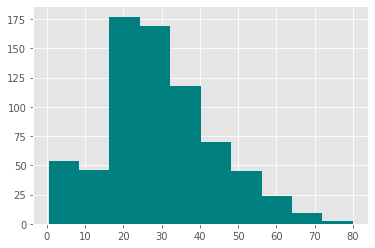

In [8]:
df['Age'].hist(color = 'teal')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

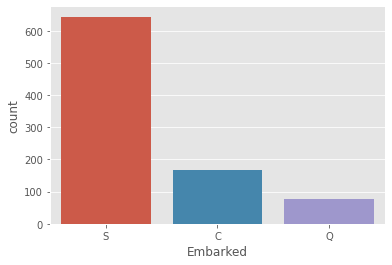

In [9]:
sns.countplot(x='Embarked', data=df)

In [10]:
df.drop('Cabin', axis=1, inplace=True)
df["Age"].fillna(df["Age"].median(skipna=True), inplace=True)
df["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [13]:
df['TA']=np.where((df["SibSp"]+df["Parch"])>0, 0, 1)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)

df1 = pd.get_dummies(df, columns=["Pclass", "Embarked", "Sex"])

In [14]:
df1.drop('Name', axis=1, inplace=True)
df1.drop('Sex_female', axis=1, inplace=True)
df1.drop('PassengerId', axis=1, inplace=True)
df1.drop('Ticket', axis=1, inplace=True)
df1.drop('Fare', axis=1, inplace=True)
df1.drop('Age', axis=1, inplace=True)


In [15]:
df1

,Survived,TA,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,0,1,0,0,0
2,1,1,0,0,1,0,0,1,0
3,1,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,0,1,1
887,1,1,1,0,0,0,0,1,0
888,0,0,0,0,1,0,0,1,0
889,1,1,1,0,0,1,0,0,1


In [16]:
x = df1.drop('Survived', axis=1)
Y = df1['Survived']
sc = StandardScaler()
X = sc.fit_transform(x)
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [17]:
x 

,TA,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,0,0,1,0,0,1,1
1,0,1,0,0,1,0,0,0
2,1,0,0,1,0,0,1,0
3,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,0,1,1
887,1,1,0,0,0,0,1,0
888,0,0,0,1,0,0,1,0
889,1,1,0,0,1,0,0,1


In [18]:
theta = np.zeros(X.shape[1])

In [19]:
df1.corr()

,Survived,TA,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
Survived,1.000000,-0.203367,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683,-0.543351
TA,-0.203367,1.000000,-0.113364,-0.039070,0.129472,-0.095298,0.086464,0.029074,0.303646
Pclass_1,0.285904,-0.113364,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921,-0.098013
Pclass_2,0.093349,-0.039070,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980,-0.064746
Pclass_3,-0.322308,0.129472,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104,0.137143
Embarked_C,0.168240,-0.095298,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.782742,-0.082853
Embarked_Q,0.003650,0.086464,-0.155342,-0.127301,0.237449,-0.148258,1.000000,-0.499421,-0.074115
Embarked_S,-0.149683,0.029074,-0.161921,0.189980,-0.015104,-0.782742,-0.499421,1.000000,0.119224
Sex_male,-0.543351,0.303646,-0.098013,-0.064746,0.137143,-0.082853,-0.074115,0.119224,1.000000


In [20]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [21]:
def costFunc(x, y, theta, K):
    z = sigmoid(np.dot(x, theta.T))
    p = -(np.array(y)*np.array(np.log(z)) +
          np.array(1-y)*np.array(np.log(1-z)))
    cost = p.mean() + (K/2)*np.sum(theta.dot(theta.T))
    return cost

In [22]:
def gradDescent(x, y, theta, alpha):
    h = sigmoid(x.dot(theta.T))
    loss = h-y
    theta -= (alpha/(len(x))*(loss.T.dot(x)))
    return theta

In [23]:
def model(x, y, theta, K,  alpha, epoch):
    costHist = []
    for _ in range(epoch):
        theta = gradDescent(x, y, theta, alpha)
        if((_+1) % 1000 == 0):
            loss = costFunc(x, y, theta, K)
            costHist.append(loss)
            print(f"Epoch: {_+1}, Cost: {loss}")
    return theta, costHist

In [24]:
theta, costList = model(X_train, Y_train, theta, K =0.008, alpha=0.003, epoch=30000)

Epoch: 1000, Cost: 0.5396353042175762
Epoch: 2000, Cost: 0.5136176718760281
Epoch: 3000, Cost: 0.5056040999858259
Epoch: 4000, Cost: 0.5025864475747989
Epoch: 5000, Cost: 0.5013748636122733
Epoch: 6000, Cost: 0.5009010235910878
Epoch: 7000, Cost: 0.5007453314847177
Epoch: 8000, Cost: 0.5007271837089362
Epoch: 9000, Cost: 0.5007648779119371
Epoch: 10000, Cost: 0.5008208735925901
Epoch: 11000, Cost: 0.5008782925813013
Epoch: 12000, Cost: 0.5009301372420273
Epoch: 13000, Cost: 0.5009741206118649
Epoch: 14000, Cost: 0.5010101253055128
Epoch: 15000, Cost: 0.5010389462508092
Epoch: 16000, Cost: 0.501061676950996
Epoch: 17000, Cost: 0.5010794221548813
Epoch: 18000, Cost: 0.5010931756807717
Epoch: 19000, Cost: 0.5011037801761172
Epoch: 20000, Cost: 0.5011119257026758
Epoch: 21000, Cost: 0.5011181649930834
Epoch: 22000, Cost: 0.5011229342574665
Epoch: 23000, Cost: 0.5011265742196256
Epoch: 24000, Cost: 0.5011293490772577
Epoch: 25000, Cost: 0.5011314626079284
Epoch: 26000, Cost: 0.5011330713789

In [25]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

Text(0, 0.5, 'Cost')

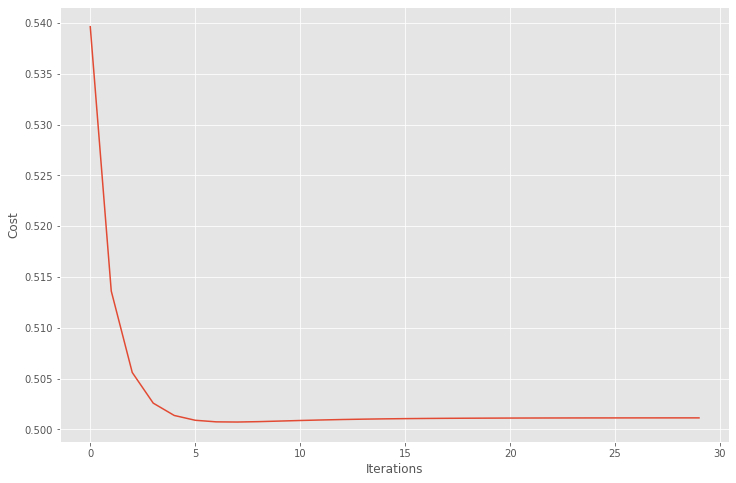

In [26]:
plt.plot(costList)
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [27]:
def predict(theta, X):
    y_ = []
    p = sigmoid(X.dot(theta))
    for _ in range(len(p)):
        if p[_] >= 0.5:
            y_.append(1)
        else:
            y_.append(0)
    return y_

In [28]:
y_pred = predict(theta, X_test)

In [29]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred)

0.7457627118644069